## Drift Diffusion Video


A simple example of plotting the drift diffusion as a video


In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import matplotlib.gridspec as gridspec # subplots
import warnings
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
from celluloid import Camera

In [2]:
N=50
x=1.0*np.ones(N+1)
T=1000

In [3]:
N=50
x=1.0*np.ones(N+1)
T=1000
steps = np.random.normal(0.1, 1, size=(N, T))
stepsV = np.random.normal(0.12, 1, size=(N, T))
stepsA = np.random.normal(0.09, 1, size=(N, T))


# compute the cumulative sum of all the steps over the time axis
sim = np.cumsum(steps, axis=1)
simV = np.cumsum(stepsV, axis=1)
simA = np.cumsum(stepsA, axis=1)






MovieWriter Pillow unavailable; using Pillow instead.


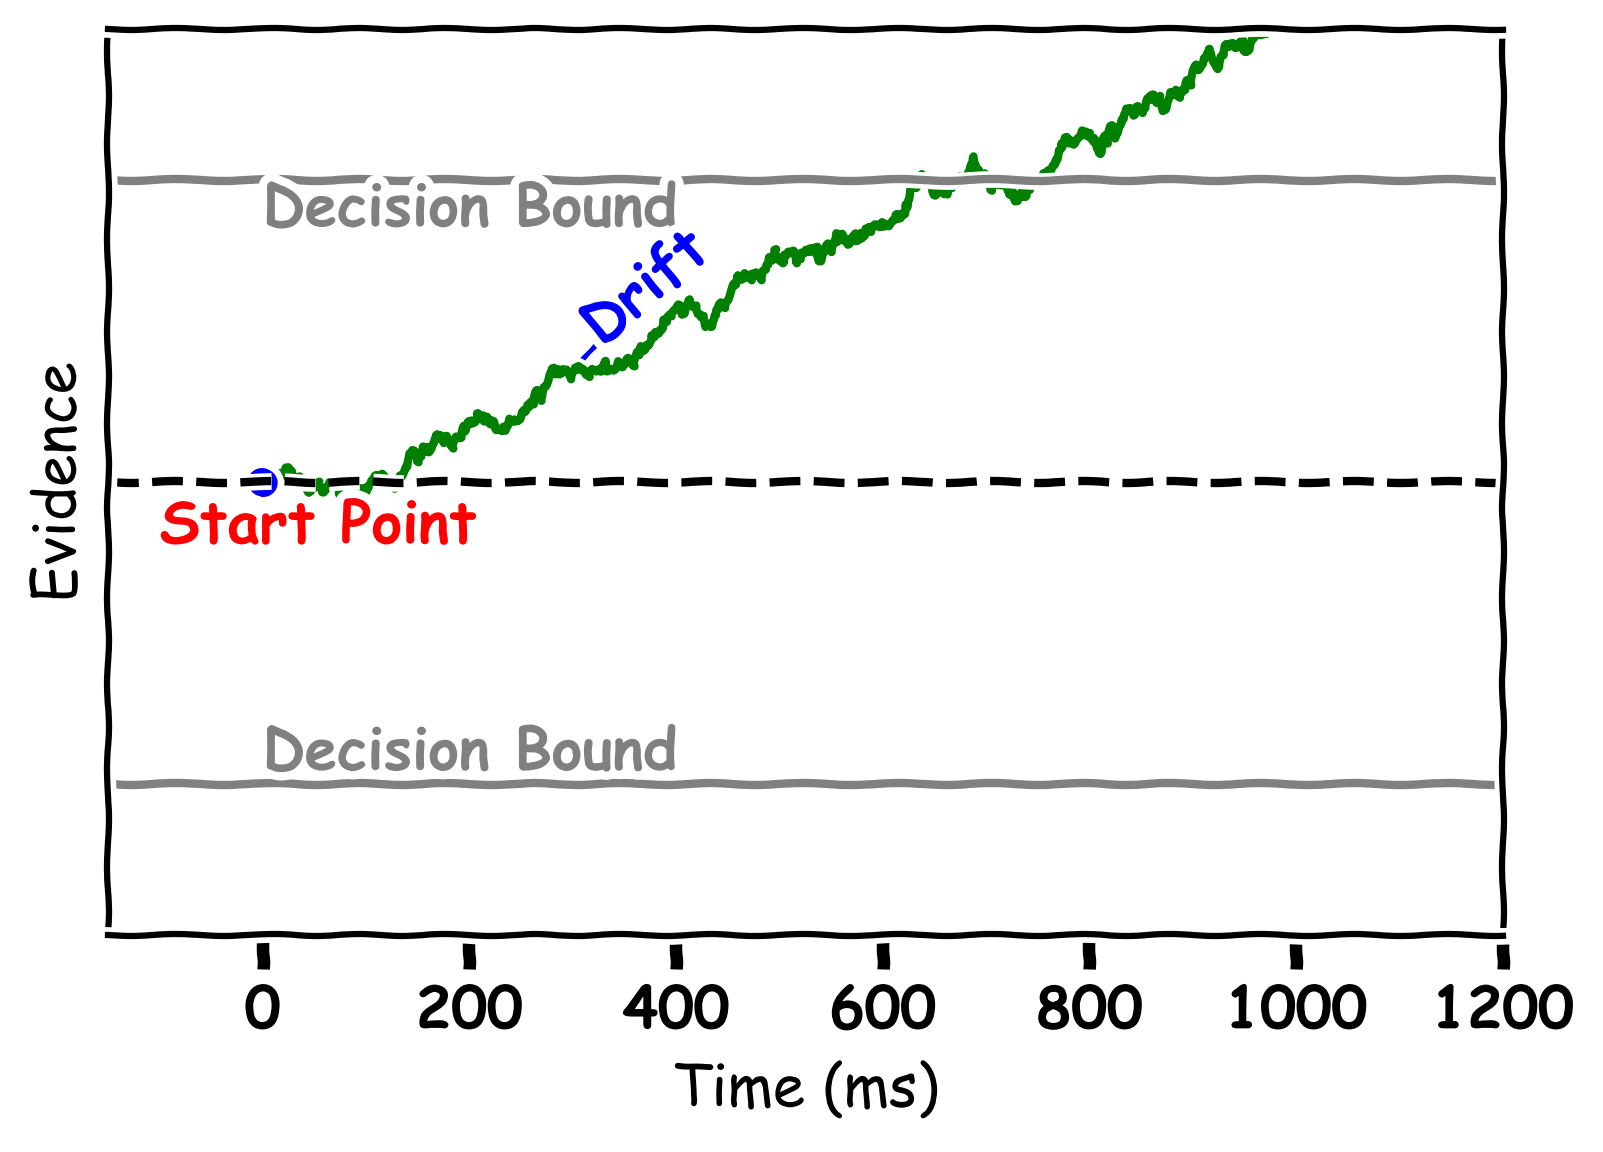

In [4]:
with plt.xkcd():

    fig = plt.figure(figsize=(6, 4),dpi=300)
    camera=Camera(fig)
    ax = fig.add_subplot(1,1,1)
    for n in range(0,1000+1,50): 
        ax.plot(sim[0,0:n],color='green')#,label='Hares')
        ax.plot(0,0,'o',color='blue')#,label='Hares')
        ax.text(0,85,'Decision Bound' ,color='grey')
        ax.text(0,-95,'Decision Bound' ,color='grey')
        ax.text(-100,-20,'Start Point' ,color='red')

        ax.axhline(100,color='grey')#,label='Hares')
        ax.axhline(-100,color='grey')#,label='Hares')
        ax.axhline(0,linestyle='dashed',color='black')#,label='Hares')

        ax.set_ylabel('Evidence')
        ax.set_xlabel('Time (ms)')
        if n >400: 
            ax.arrow(300, sim[0,300]+1, 80, (sim[0,400]-sim[0,300])*1.4, head_width=10, head_length=10,color='blue')
            ax.text(300,sim[0,300]+10,'Drift',rotation=40, color='blue')
        camera.snap()
        ax.set_ylim(-150,150)
        ax.set_xlim(-150,1200)
        ax.set_yticks([])
    animation = camera.animate()
    animation.save('DDM.gif', writer='Pillow', fps=5)
    

MovieWriter Pillow unavailable; using Pillow instead.


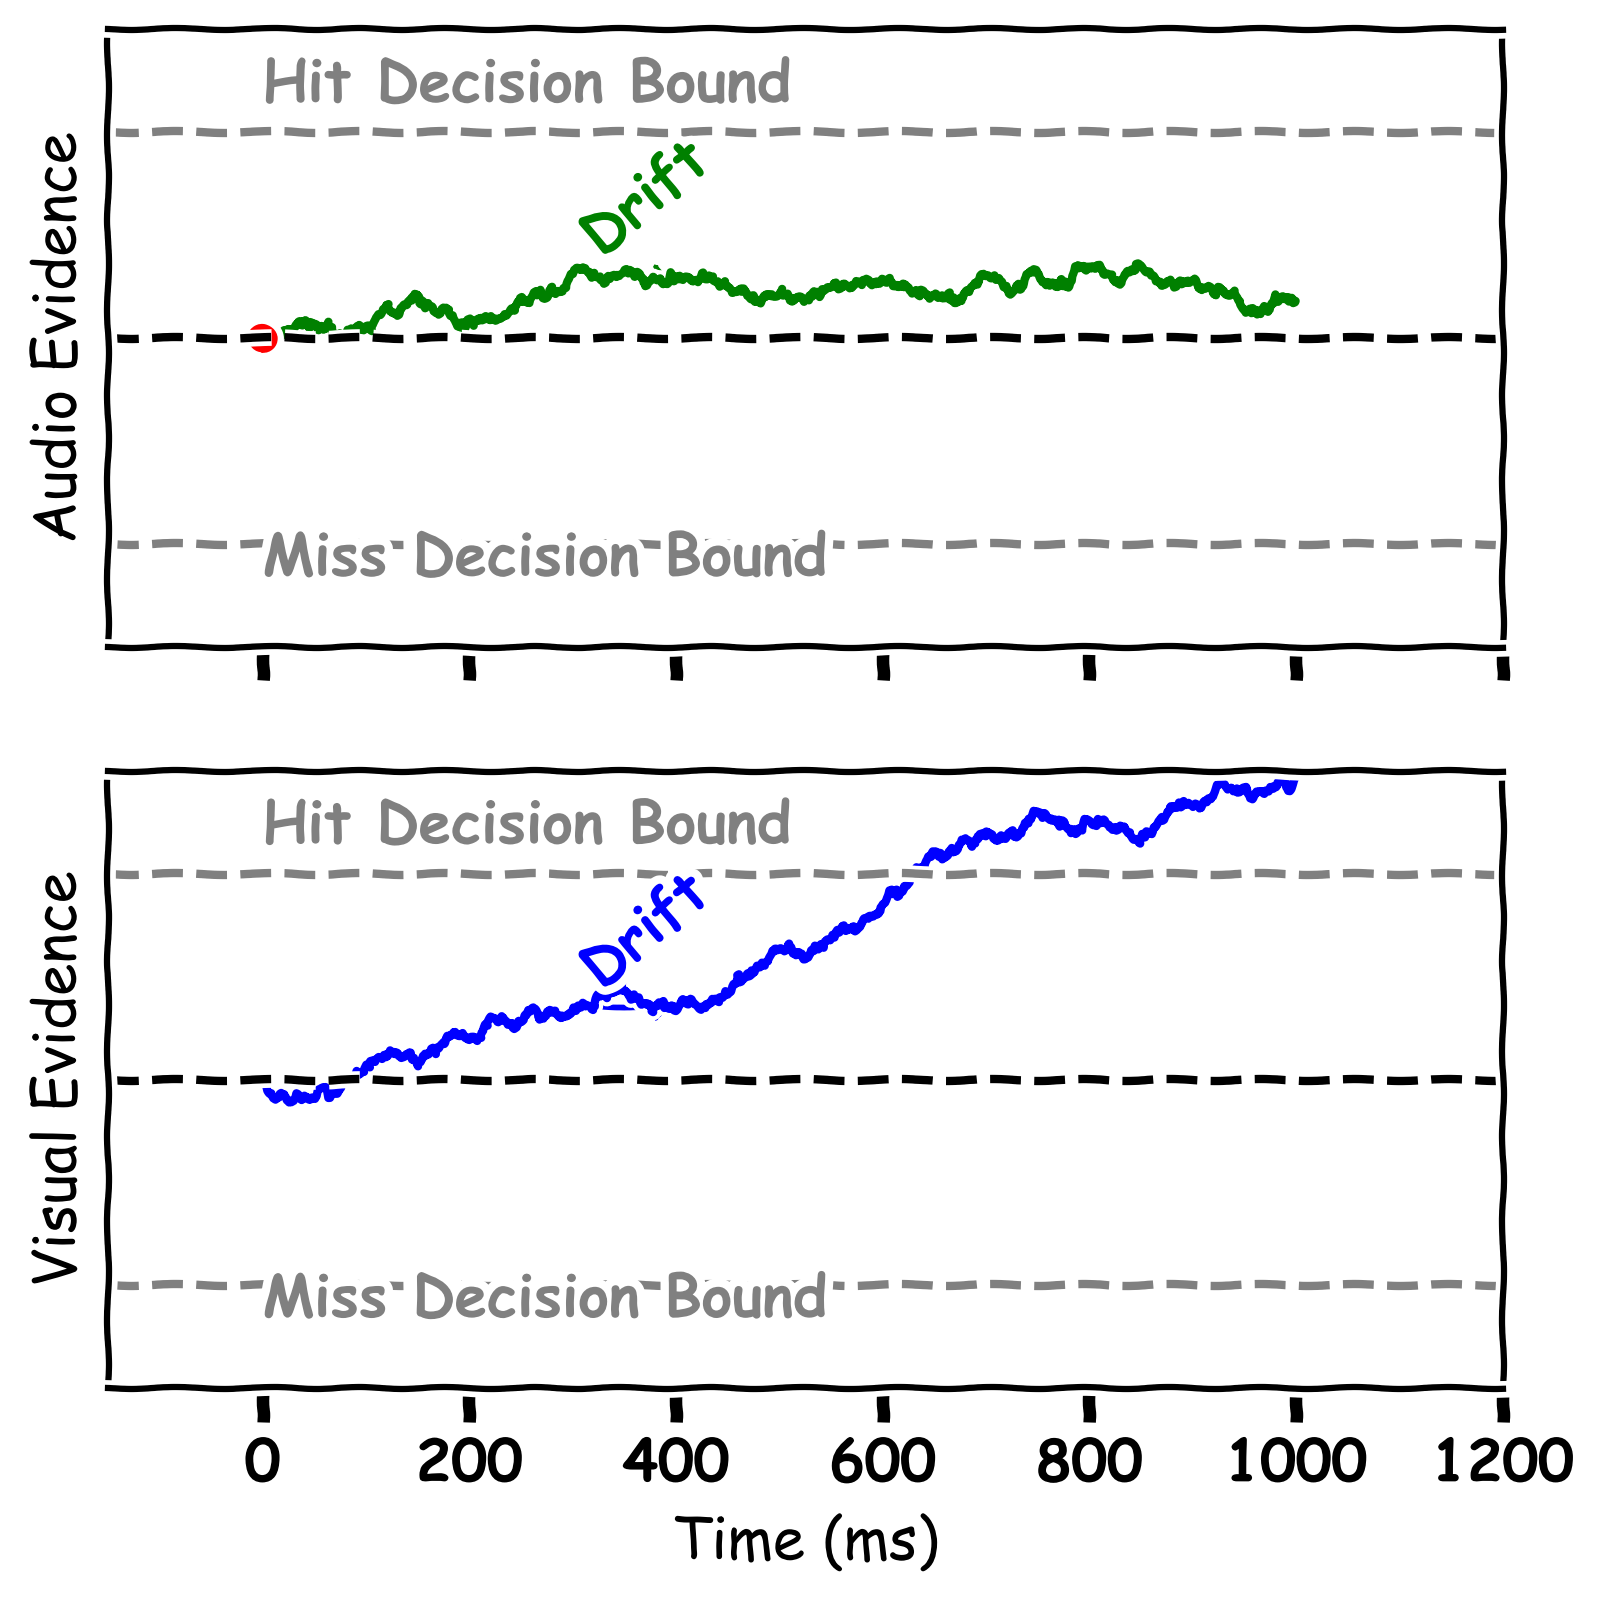

In [5]:
with plt.xkcd():

   # fig = plt.figure(figsize=(12, 6))
    fig, ax= plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,figsize=(6, 6),dpi=300)
    camera=Camera(fig)
    #ax = fig.add_subplot(2,1,1)
    for n in range(0,1000+1,50): 
        ax[0].plot(simA[0,0:n],color='green')#,label='Hares')
        ax[1].plot(simV[0,0:n],color='blue')#,label='Hares')
        ax[0].plot(0,0,'o',color='red')#,label='Hares')
        ax[0].text(0,115,'Hit Decision Bound' ,color='grey')
        ax[0].text(0,-115,'Miss Decision Bound' ,color='grey')
        ax[1].text(0,115,'Hit Decision Bound' ,color='grey')
        ax[1].text(0,-115,'Miss Decision Bound' ,color='grey')

        ax[0].axhline(100,linestyle='dashed',color='grey')#,label='Hares')
        ax[0].axhline(-100,linestyle='dashed',color='grey')#,label='Hares')
        ax[0].axhline(0,linestyle='dashed',color='black')#,label='Hares')
        ax[1].axhline(100,linestyle='dashed',color='grey')#,label='Hares')
        ax[1].axhline(-100,linestyle='dashed',color='grey')#,label='Hares')
        ax[1].axhline(0,linestyle='dashed',color='black')#,label='Hares')


        ax[0].set_ylabel('Audio Evidence')
        ax[1].set_ylabel('Visual Evidence')
        ax[1].set_xlabel('Time (ms)')
        if n >400: 
            ax[0].arrow(300, simA[0,300]+1, 80, (simA[0,400]-simA[0,300])*1.4, head_width=10, head_length=10,color='green')
            ax[0].text(300,simA[0,300]+10,'Drift',rotation=40, color='green')
            ax[1].arrow(300, simV[0,300]+1, 80, (simV[0,400]-simV[0,300])*1.4, head_width=10, head_length=10,color='blue')
            ax[1].text(300,simV[0,300]+10,'Drift',rotation=40, color='blue')
        else:
             ax[0].text(-100,-20,'Start Point' ,color='red')
             ax[1].text(-100,-20,'Start Point' ,color='red')



        camera.snap()
        ax[0].set_ylim(-150,150)
        ax[0].set_xlim(-150,1200)
        ax[0].set_yticks([])
     
    animation = camera.animate()
    animation.save('DDM_A_V.gif', writer='Pillow', fps=5)

MovieWriter Pillow unavailable; using Pillow instead.


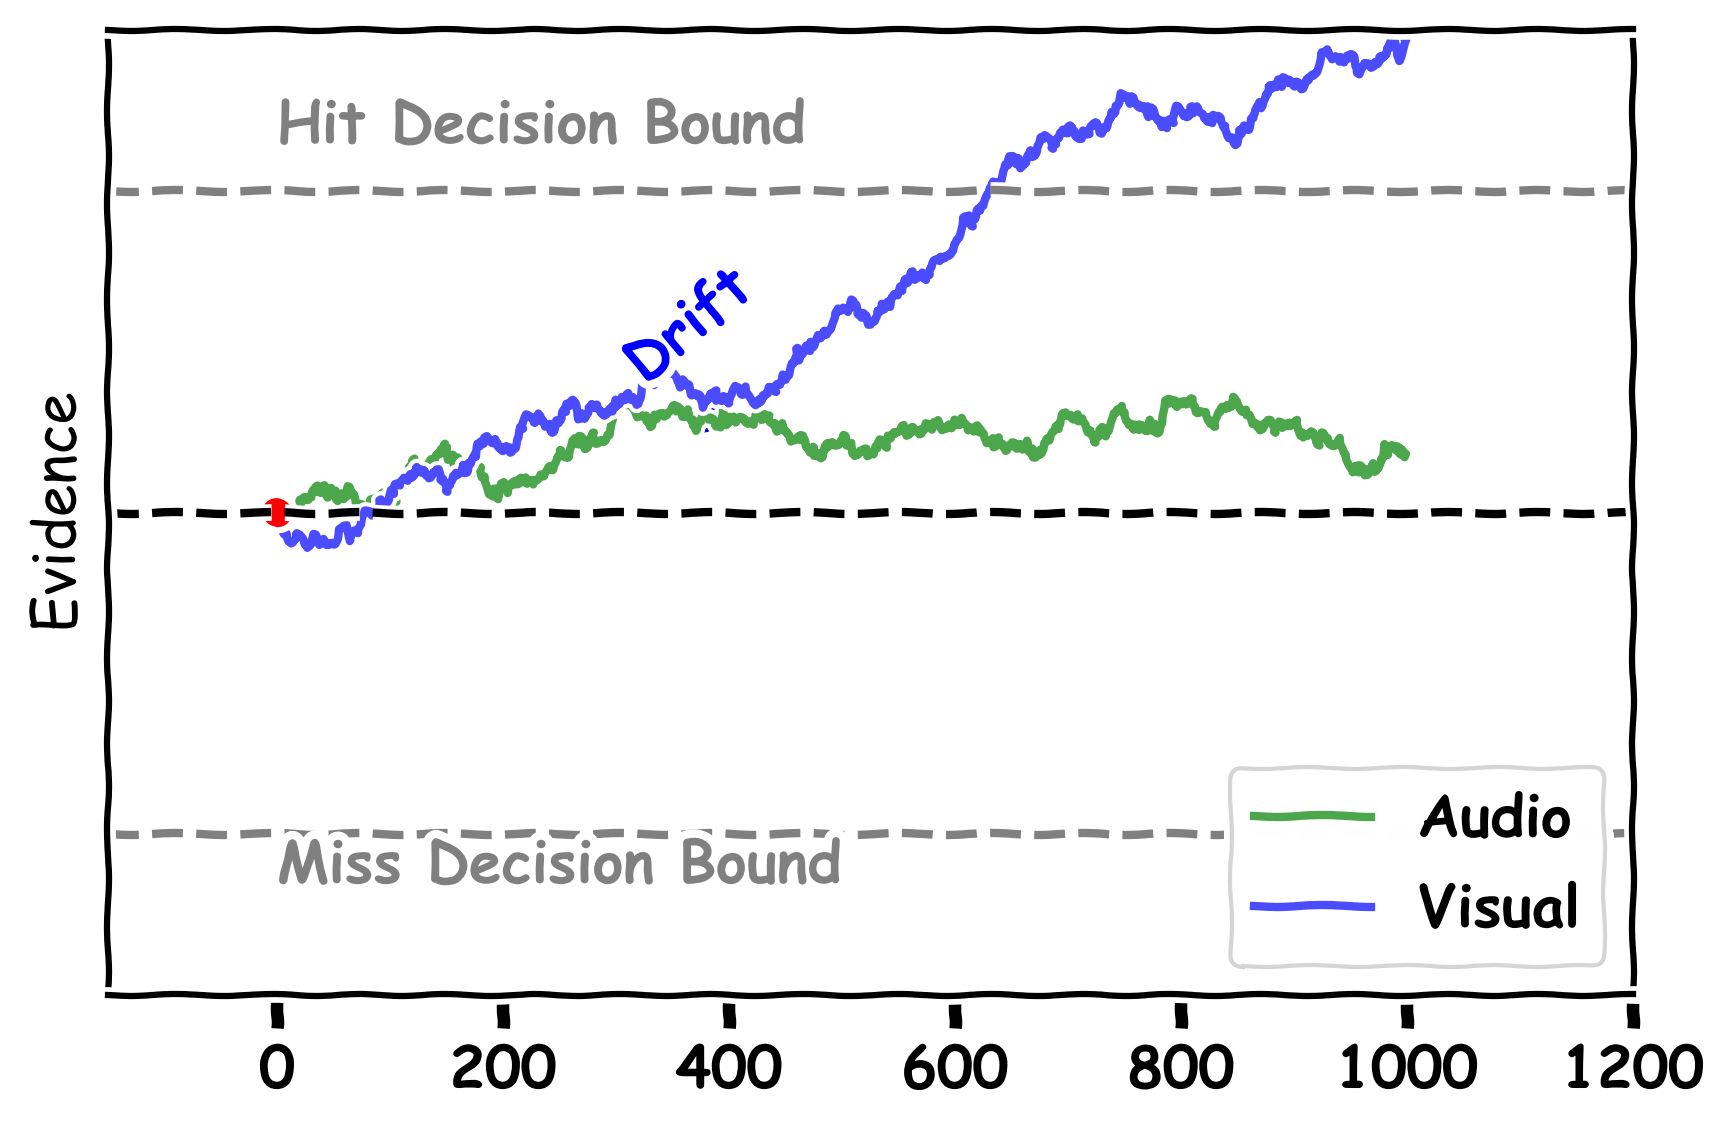

In [6]:
with plt.xkcd():

   # fig = plt.figure(figsize=(12, 6))
    fig, ax= plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(6, 4),dpi=300)
    camera=Camera(fig)
    #ax = fig.add_subplot(2,1,1)
    for n in range(0,1000+1,50): 
        ax.plot(simA[0,0:n],color='green',label='Audio', alpha=0.7)
        ax.plot(simV[0,0:n],color='blue',label='Visual', alpha=0.7)
    #    ax.plot(simV[0,0:n]+simA[0,0:n],color='black',label='AV')
        ax.plot(0,0,'o',color='red')#,label='Hares')
        ax.text(0,115,'Hit Decision Bound' ,color='grey')
        ax.text(0,-115,'Miss Decision Bound' ,color='grey')
 
        ax.axhline(100,linestyle='dashed',color='grey')#,label='Hares')
        ax.axhline(-100,linestyle='dashed',color='grey')#,label='Hares')
        ax.axhline(0,linestyle='dashed',color='black')#,label='Hares')
        if n==0:
            ax.legend(loc ="lower right")
        
        ax.set_ylabel('Evidence')
        
        if n >400: 
            ax.arrow(300, simA[0,300]+1, 80, (simA[0,400]-simA[0,300])*1.4, head_width=10, head_length=10,color='blue')
            ax.text(300,simA[0,300]+10,'Drift',rotation=40, color='blue')
        else:
             ax.text(-100,-20,'Start Point' ,color='red')
 
        ax.set_ylim(-150,150)
        ax.set_xlim(-150,1200)
        ax.set_yticks([])
        plt.tight_layout()


        camera.snap()
     
    animation = camera.animate()
    animation.save('DDM_A_V_race_xkcd.gif', writer='Pillow', fps=5)

MovieWriter Pillow unavailable; using Pillow instead.


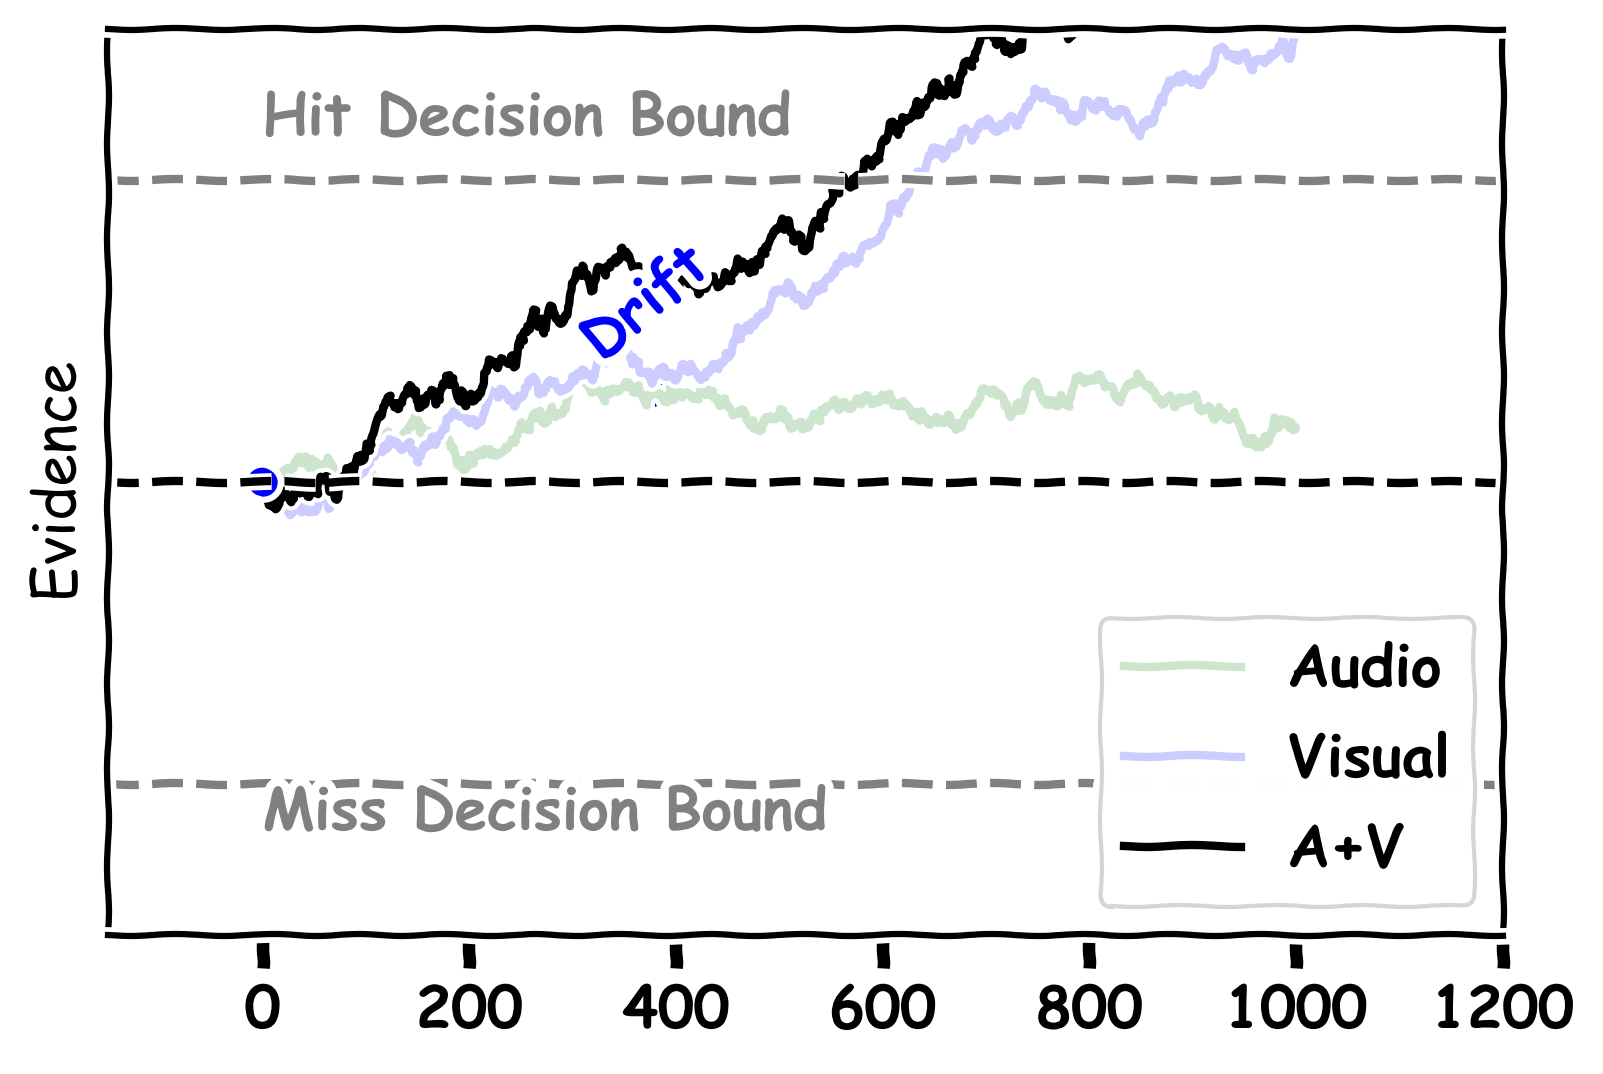

In [7]:
with plt.xkcd():

   # fig = plt.figure(figsize=(12, 6))
    fig, ax= plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(6, 4),dpi=300)
    camera=Camera(fig)
    #ax = fig.add_subplot(2,1,1)
    for n in range(0,1000+1,50): 
        ax.plot(simA[0,0:n],color='green',label='Audio', alpha=0.2)
        ax.plot(simV[0,0:n],color='blue',label='Visual', alpha=0.2)
        ax.plot(simV[0,0:n]+simA[0,0:n],color='black',label='A+V')
        ax.plot(0,0,'o',color='blue')#,label='Hares')
        ax.text(0,115,'Hit Decision Bound' ,color='grey')
        ax.text(0,-115,'Miss Decision Bound' ,color='grey')
 
        ax.axhline(100,linestyle='dashed',color='grey')#,label='Hares')
        ax.axhline(-100,linestyle='dashed',color='grey')#,label='Hares')
        ax.axhline(0,linestyle='dashed',color='black')#,label='Hares')
        if n==0:
            ax.legend(loc ="lower right")
        
        ax.set_ylabel('Evidence')
        
        if n >400: 
            ax.arrow(300, simA[0,300]+1, 80, (simA[0,400]-simA[0,300])*1.4, head_width=10, head_length=10,color='blue')
            ax.text(300,simA[0,300]+10,'Drift',rotation=40, color='blue')
        else:
             ax.text(-100,-20,'Start Point' ,color='red')
 


        camera.snap()
        ax.set_ylim(-150,150)
        ax.set_xlim(-150,1200)
        ax.set_yticks([])
     
    animation = camera.animate()
    animation.save('DDM_A_V_sum.gif', writer='Pillow', fps=5)

In [8]:
np.sqrt(8*8+8*8)

11.313708498984761